<a href="https://colab.research.google.com/github/chakrabortysayantan699/Image_processing_programs/blob/main/Diabetes%20_Prdiction_using_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
#load data
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA/diabetes.csv")

In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
#importing libray
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#training dataset
X=data.iloc[:,:8]
X.shape

(768, 8)

In [ ]:
X.shape

(768, 8)

In [8]:
#testing data
Y=data.iloc[:,-1]
Y.shape

(768,)

In [ ]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [9]:
#spliting for training and testing 
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.20,random_state=10)

In [10]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (614, 8)
x_test shape (154, 8)
y_train shape (614,)
y_test shape (154,)


In [11]:
#fileds in training dataset
filed=list(data.columns)
filed=filed[:8]
filed

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [13]:
# replacing 0 value with mean
for i in filed:
  data[i]=data[i].replace(0,data[i].mean())
  

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
def check_zero_entries(data, fields):
    """ List number of 0-entries in each of the given fields"""
    for field in fields:
        print('field %s: num 0-entries: %d' % (field, len(data.loc[ data[field] == 0, field ])))
check_zero_entries(data,filed)

field Pregnancies: num 0-entries: 0
field Glucose: num 0-entries: 0
field BloodPressure: num 0-entries: 0
field SkinThickness: num 0-entries: 0
field Insulin: num 0-entries: 0
field BMI: num 0-entries: 0
field DiabetesPedigreeFunction: num 0-entries: 0
field Age: num 0-entries: 0


In [ ]:
check_zero_entries(data,filed)

field Pregnancies: num 0-entries: 0
field Glucose: num 0-entries: 0
field BloodPressure: num 0-entries: 0
field SkinThickness: num 0-entries: 0
field Insulin: num 0-entries: 0
field BMI: num 0-entries: 0
field DiabetesPedigreeFunction: num 0-entries: 0
field Age: num 0-entries: 0


In [16]:
x_train=x_train.values
y_train=y_train.values
x_test=x_test.values
y_test=y_test.values

In [21]:
#creating model
model1 = Sequential()
model1.add(Dense(12, input_shape=(8,), activation='relu',name="layer1"))
model1.add(Dense(8, activation='relu',name="layer2"))
model1.add(Dense(12, activation='relu',name="layer3"))
model1.add(Dense(1, activation='sigmoid',name="output"))

In [22]:
#compile model
import tensorflow as tf
model1.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 12)                108       
                                                                 
 layer2 (Dense)              (None, 8)                 104       
                                                                 
 layer3 (Dense)              (None, 12)                108       
                                                                 
 output (Dense)              (None, 1)                 13        
                                                                 
Total params: 333
Trainable params: 333
Non-trainable params: 0
_________________________________________________________________


In [23]:
history=model1.fit(x_train,y_train,validation_data=(x_test, y_test),epochs=500,batch_size=10)

Epoch 1/500
62/62 [==============================] - 2s 16ms/step - loss: 3.3098 - accuracy: 0.5537 - val_loss: 1.1767 - val_accuracy: 0.6104
Epoch 2/500
62/62 [==============================] - 0s 7ms/step - loss: 1.0324 - accuracy: 0.6433 - val_loss: 0.8824 - val_accuracy: 0.6234
Epoch 3/500
62/62 [==============================] - 0s 7ms/step - loss: 0.7536 - accuracy: 0.6531 - val_loss: 0.7323 - val_accuracy: 0.6234
Epoch 4/500
62/62 [==============================] - 0s 5ms/step - loss: 0.6700 - accuracy: 0.6482 - val_loss: 0.7053 - val_accuracy: 0.6234
Epoch 5/500
62/62 [==============================] - 0s 6ms/step - loss: 0.6554 - accuracy: 0.6580 - val_loss: 0.6610 - val_accuracy: 0.6039
Epoch 6/500
62/62 [==============================] - 0s 7ms/step - loss: 0.6297 - accuracy: 0.6645 - val_loss: 0.6580 - val_accuracy: 0.6364
Epoch 7/500
62/62 [==============================] - 0s 6ms/step - loss: 0.6302 - accuracy: 0.6645 - val_loss: 0.6525 - val_accuracy: 0.6299
Epoch 8/500


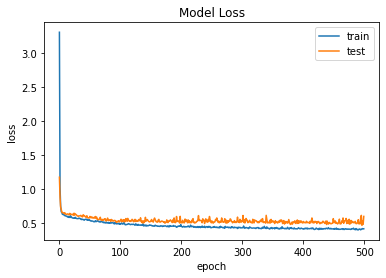

In [26]:
#loss ploting
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

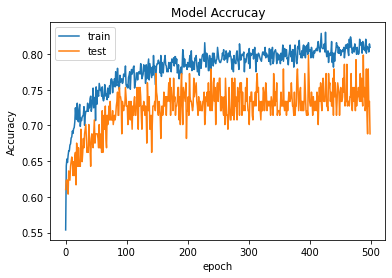

In [25]:
#Accuracy ploting
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accrucay')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()